# CNN

## Importing libraries

In [2]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:00:01m
Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,4)

import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go

import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import mean_squared_error, mean_absolute_error
from plotly.offline import init_notebook_mode, iplot

2022-12-08 11:18:32.100435: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 11:18:32.937568: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 11:18:32.937682: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-08 11:18:34.864157: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

## Reading data

In [4]:
X_train = pd.read_csv('data/X_train_complete.csv', index_col=['date'])
y_train = pd.read_csv('data/y_train_complete.csv', index_col=['date'])

X_test = pd.read_csv('data/X_test.csv', index_col=['date'])
y_test = pd.read_csv('data/y_test.csv', index_col=['date'])

In [5]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [6]:
full_data = pd.concat([train_data, test_data], axis=0)

In [7]:
full_data

,maximum_atmospheric_pressure,minimum_atmospheric_pressure,precipitation,maximum_air_temperature,minimum_air_temperature,maximum_relative_humidity,minimum_relative_humidity,total_solar_radiation,maximum_temperature,minimum_temperature,average_air_temperature,average_relative_humidity,wind_speed,total_solar_radiation.1,reference_evapotranspiration
date,,,,,,,,,,,,,,,
2017-01-01,617.799658,599.803362,0.000000,30.318042,28.722792,66.477167,60.174625,2145.823333,21.408342,20.312011,29.543242,63.174958,1.132543,5.960620,0.058537
2017-01-02,620.147296,599.795100,0.000000,29.630875,28.269417,67.488500,61.223083,1951.849667,21.264383,20.061859,28.910676,64.436735,1.087624,5.421805,0.048532
2017-01-03,620.212662,599.817608,0.000000,29.409917,28.005583,70.001792,64.124500,2104.909208,21.635286,20.695279,28.650169,67.002696,1.630787,5.846970,0.064639
2017-01-04,616.165437,599.787975,0.105833,29.755875,28.265958,69.879833,63.227792,1963.737875,21.848865,20.813229,28.881102,66.914866,1.921033,5.454827,0.072362
2017-01-05,619.378317,599.802992,0.000000,28.977792,27.437292,70.608750,64.299542,2001.953125,21.344600,20.438310,28.167198,67.434008,1.197141,5.560981,0.048342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-25,617.598033,599.774778,0.000000,26.162222,25.260667,77.043111,72.860000,2500.997667,21.037083,20.542369,25.666700,75.260879,1.739529,6.947216,0.035565
2017-11-26,618.306160,599.760990,0.000000,25.160600,24.471200,80.193500,75.632100,2459.780530,20.800224,20.227300,24.812676,77.932516,1.118328,7.850408,0.025799
2017-11-27,618.387980,599.769210,0.000000,26.168600,25.124500,79.476900,73.358900,2507.158000,21.240160,20.642043,25.678424,76.354913,1.606195,7.510718,0.034958


In [8]:
BATCH_SIZE = 32
N_INPUT = len(X_train)
N_FEATURES = len(X_train.columns)

In [ ]:
trace0 = go.Scatter(
    x = train_data.index,
    y = train_data['reference_evapotranspiration'],
    name = 'Train'
)

trace1 = go.Scatter(
    x = test_data.index,
    y = test_data['reference_evapotranspiration'],
    name = 'Validation'
)

data = [trace0, trace1]

iplot(data)

In [10]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [11]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [12]:
HORIZON = 1
WINDOW_SIZE = 7

In [13]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [14]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


2022-12-08 11:19:20.970053: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 11:19:20.970561: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 11:19:20.970692: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-08 11:19:20.970772: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-08 11:19:20.970857: W tensorflow/c

In [15]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [16]:
timesteps = full_data.index.to_numpy()
re = full_data["reference_evapotranspiration"].to_numpy()

In [17]:
full_windows, full_labels = make_windows(re, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(327, 327)

In [18]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [0.05853737 0.04853203 0.06463882 0.0723622  0.04834153 0.0520071
 0.04217207] -> Label: [0.05636294]
Window: [0.04853203 0.06463882 0.0723622  0.04834153 0.0520071  0.04217207
 0.05636294] -> Label: [0.04979837]
Window: [0.06463882 0.0723622  0.04834153 0.0520071  0.04217207 0.05636294
 0.04979837] -> Label: [0.04917493]


In [19]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [20]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(261, 66, 261, 66)

In [21]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [22]:
train_windows.shape, train_labels.shape

((261, 7), (261, 1))

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min',
                                                  verbose = 1, patience = 20)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                                 patience=5, min_lr=0.00001)

In [24]:
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, Conv1D
import tensorflow as tf
from tensorflow.keras import layers

In [28]:
# %%time

# Create model
model = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=64, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_conv1D")

rmse = tf.keras.metrics.RootMeanSquaredError()
# mape = tf.keras.metrics.mean_absolute_percentage_error()

# Compile model
model.compile(loss="mean_squared_error",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[rmse,'mape','mae'])

history_1 = model.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model.name)])

Epoch 1/100
1/3 [=========>....................] - ETA: 2s - loss: 0.0015 - root_mean_squared_error: 0.0382 - mape: 93.4010 - mae: 0.0344

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 2s 667ms/step - loss: 0.0011 - root_mean_squared_error: 0.0339 - mape: 78.8652 - mae: 0.0295 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 53.8474 - val_mae: 0.0382
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 4.2324e-04 - root_mean_squared_error: 0.0206 - mape: 43.6630 - mae: 0.0162

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 394ms/step - loss: 3.2132e-04 - root_mean_squared_error: 0.0179 - mape: 45.9285 - mae: 0.0141 - val_loss: 4.6874e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 27.7419 - val_mae: 0.0195
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 1.9530e-04 - root_mean_squared_error: 0.0140 - mape: 55.7038 - mae: 0.0116

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 330ms/step - loss: 2.1956e-04 - root_mean_squared_error: 0.0148 - mape: 64.1192 - mae: 0.0120 - val_loss: 1.8708e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 17.7876 - val_mae: 0.0112
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 3.3411e-04 - root_mean_squared_error: 0.0183 - mape: 83.3937 - mae: 0.0157

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 333ms/step - loss: 3.3869e-04 - root_mean_squared_error: 0.0184 - mape: 84.0778 - mae: 0.0157 - val_loss: 1.6551e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 16.8797 - val_mae: 0.0103
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 3.1859e-04 - root_mean_squared_error: 0.0178 - mape: 81.2260 - mae: 0.0152 - val_loss: 2.2758e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 19.5663 - val_mae: 0.0128
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 2.2094e-04 - root_mean_squared_error: 0.0149 - mape: 65.6274 - mae: 0.0121 - val_loss: 3.7913e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 25.0826 - val_mae: 0.0174
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 1.6989e-04 - root_mean_squared_error: 0.0130 - mape: 50.9483 - mae: 0.0103 - val_loss: 5.5098e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 30.1824 - val_mae: 0.0214
Epoch 8/100
3/3 [==========

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 389ms/step - loss: 1.1593e-04 - root_mean_squared_error: 0.0108 - mape: 38.4589 - mae: 0.0082 - val_loss: 1.5853e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 16.4111 - val_mae: 0.0104
Epoch 34/100
1/3 [=========>....................] - ETA: 0s - loss: 1.3571e-04 - root_mean_squared_error: 0.0116 - mape: 49.1053 - mae: 0.0088

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 306ms/step - loss: 1.1698e-04 - root_mean_squared_error: 0.0108 - mape: 40.1495 - mae: 0.0082 - val_loss: 1.4787e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 15.8326 - val_mae: 0.0098
Epoch 35/100
3/3 [==============================] - 0s 17ms/step - loss: 1.1791e-04 - root_mean_squared_error: 0.0109 - mape: 40.6303 - mae: 0.0083 - val_loss: 1.5333e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 16.1280 - val_mae: 0.0101
Epoch 36/100
3/3 [==============================] - 0s 19ms/step - loss: 1.1516e-04 - root_mean_squared_error: 0.0107 - mape: 39.1472 - mae: 0.0082 - val_loss: 1.5707e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 16.3241 - val_mae: 0.0103
Epoch 37/100
3/3 [==============================] - 0s 22ms/step - loss: 1.1394e-04 - root_mean_squared_error: 0.0107 - mape: 38.3608 - mae: 0.0081 - val_loss: 1.6073e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 16.5187 - val_mae: 0.0105
Epoch 38/100
3/3 [======

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 273ms/step - loss: 1.1186e-04 - root_mean_squared_error: 0.0106 - mape: 36.8206 - mae: 0.0081 - val_loss: 1.4083e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 15.4514 - val_mae: 0.0095
Epoch 43/100
1/3 [=========>....................] - ETA: 0s - loss: 1.3581e-04 - root_mean_squared_error: 0.0117 - mape: 45.3484 - mae: 0.0086

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 281ms/step - loss: 1.1436e-04 - root_mean_squared_error: 0.0107 - mape: 39.5205 - mae: 0.0081 - val_loss: 1.2887e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 14.8339 - val_mae: 0.0088
Epoch 44/100
1/3 [=========>....................] - ETA: 0s - loss: 1.3758e-04 - root_mean_squared_error: 0.0117 - mape: 41.9415 - mae: 0.0089

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 307ms/step - loss: 1.2298e-04 - root_mean_squared_error: 0.0111 - mape: 42.7856 - mae: 0.0085 - val_loss: 1.2800e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 14.7843 - val_mae: 0.0087
Epoch 45/100
3/3 [==============================] - 0s 20ms/step - loss: 1.2021e-04 - root_mean_squared_error: 0.0110 - mape: 41.7460 - mae: 0.0084 - val_loss: 1.4408e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 15.5821 - val_mae: 0.0097
Epoch 46/100
3/3 [==============================] - 0s 19ms/step - loss: 1.1078e-04 - root_mean_squared_error: 0.0105 - mape: 37.5932 - mae: 0.0080 - val_loss: 1.6297e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 16.5748 - val_mae: 0.0106
Epoch 47/100
3/3 [==============================] - 0s 19ms/step - loss: 1.1031e-04 - root_mean_squared_error: 0.0105 - mape: 35.6457 - mae: 0.0080 - val_loss: 1.7676e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 17.2233 - val_mae: 0.0112
Epoch 48/100
3/3 [======

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 273ms/step - loss: 1.0517e-04 - root_mean_squared_error: 0.0103 - mape: 34.8923 - mae: 0.0078 - val_loss: 1.2745e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 14.6577 - val_mae: 0.0089
Epoch 68/100
1/3 [=========>....................] - ETA: 0s - loss: 9.9462e-05 - root_mean_squared_error: 0.0100 - mape: 36.6237 - mae: 0.0075

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 476ms/step - loss: 1.0616e-04 - root_mean_squared_error: 0.0103 - mape: 36.9330 - mae: 0.0078 - val_loss: 1.2345e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 14.4547 - val_mae: 0.0086
Epoch 69/100
1/3 [=========>....................] - ETA: 0s - loss: 1.1075e-04 - root_mean_squared_error: 0.0105 - mape: 43.2054 - mae: 0.0079

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 284ms/step - loss: 1.0882e-04 - root_mean_squared_error: 0.0104 - mape: 38.1642 - mae: 0.0079 - val_loss: 1.2240e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 14.3831 - val_mae: 0.0085
Epoch 70/100
1/3 [=========>....................] - ETA: 0s - loss: 1.1060e-04 - root_mean_squared_error: 0.0105 - mape: 43.2218 - mae: 0.0077

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 0s 248ms/step - loss: 1.1086e-04 - root_mean_squared_error: 0.0105 - mape: 39.0206 - mae: 0.0080 - val_loss: 1.2098e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 14.2961 - val_mae: 0.0084
Epoch 71/100
3/3 [==============================] - 0s 19ms/step - loss: 1.1321e-04 - root_mean_squared_error: 0.0106 - mape: 39.9350 - mae: 0.0081 - val_loss: 1.2323e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 14.4187 - val_mae: 0.0086
Epoch 72/100
3/3 [==============================] - 0s 22ms/step - loss: 1.0810e-04 - root_mean_squared_error: 0.0104 - mape: 37.8918 - mae: 0.0079 - val_loss: 1.3133e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 14.8072 - val_mae: 0.0091
Epoch 73/100
3/3 [==============================] - 0s 16ms/step - loss: 1.0483e-04 - root_mean_squared_error: 0.0102 - mape: 36.5639 - mae: 0.0078 - val_loss: 1.3609e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 15.0261 - val_mae: 0.0094
Epoch 74/100
3/3 [======

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 301ms/step - loss: 1.0393e-04 - root_mean_squared_error: 0.0102 - mape: 36.3633 - mae: 0.0077 - val_loss: 1.2067e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 14.2322 - val_mae: 0.0085
Epoch 79/100
3/3 [==============================] - 0s 18ms/step - loss: 1.1410e-04 - root_mean_squared_error: 0.0107 - mape: 40.6634 - mae: 0.0082 - val_loss: 1.2167e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 14.2920 - val_mae: 0.0085
Epoch 80/100
3/3 [==============================] - 0s 18ms/step - loss: 1.0869e-04 - root_mean_squared_error: 0.0104 - mape: 38.4392 - mae: 0.0079 - val_loss: 1.3968e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 15.1435 - val_mae: 0.0095
Epoch 81/100
3/3 [==============================] - 0s 20ms/step - loss: 1.0234e-04 - root_mean_squared_error: 0.0101 - mape: 34.9234 - mae: 0.0077 - val_loss: 1.4787e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 15.4689 - val_mae: 0.0099
Epoch 82/100
3/3 [======

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 296ms/step - loss: 1.0469e-04 - root_mean_squared_error: 0.0102 - mape: 36.3459 - mae: 0.0078 - val_loss: 1.2063e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 14.2242 - val_mae: 0.0085
Epoch 84/100
3/3 [==============================] - 0s 17ms/step - loss: 1.0894e-04 - root_mean_squared_error: 0.0104 - mape: 38.7492 - mae: 0.0080 - val_loss: 1.2595e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 14.4712 - val_mae: 0.0088
Epoch 85/100
3/3 [==============================] - 0s 17ms/step - loss: 1.0223e-04 - root_mean_squared_error: 0.0101 - mape: 35.6530 - mae: 0.0077 - val_loss: 1.5994e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 16.0784 - val_mae: 0.0104
Epoch 86/100
3/3 [==============================] - 0s 17ms/step - loss: 1.0529e-04 - root_mean_squared_error: 0.0103 - mape: 32.6907 - mae: 0.0079 - val_loss: 1.9238e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 17.6366 - val_mae: 0.0118
Epoch 87/100
3/3 [======

INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_conv1D/assets


3/3 [==============================] - 1s 263ms/step - loss: 1.0319e-04 - root_mean_squared_error: 0.0102 - mape: 33.4421 - mae: 0.0078 - val_loss: 1.1912e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 14.1107 - val_mae: 0.0083
Epoch 89/100
3/3 [==============================] - 0s 17ms/step - loss: 1.1805e-04 - root_mean_squared_error: 0.0109 - mape: 41.2715 - mae: 0.0083 - val_loss: 1.2077e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 14.3811 - val_mae: 0.0083
Epoch 90/100
3/3 [==============================] - 0s 17ms/step - loss: 1.1861e-04 - root_mean_squared_error: 0.0109 - mape: 41.8571 - mae: 0.0084 - val_loss: 1.2583e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 14.4419 - val_mae: 0.0088
Epoch 91/100
3/3 [==============================] - 0s 16ms/step - loss: 1.0110e-04 - root_mean_squared_error: 0.0101 - mape: 35.0992 - mae: 0.0076 - val_loss: 1.5079e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 15.5751 - val_mae: 0.0100
Epoch 92/100
3/3 [======

In [29]:
model.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_3 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 64)             2304      
                                                                 
 dense_3 (Dense)             (None, 1, 1)              65        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


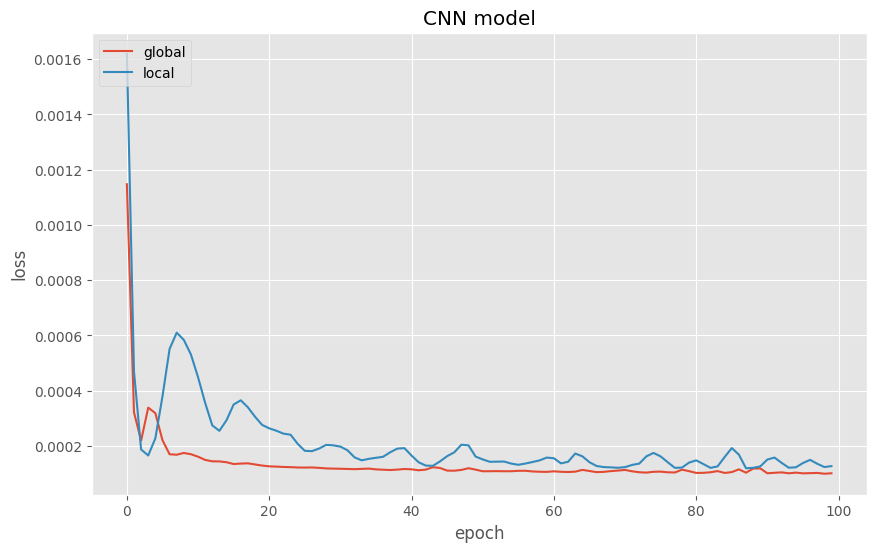

In [30]:
plt.figure(figsize=(10,6))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('CNN model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['global', 'local'], loc='upper left')
plt.show()

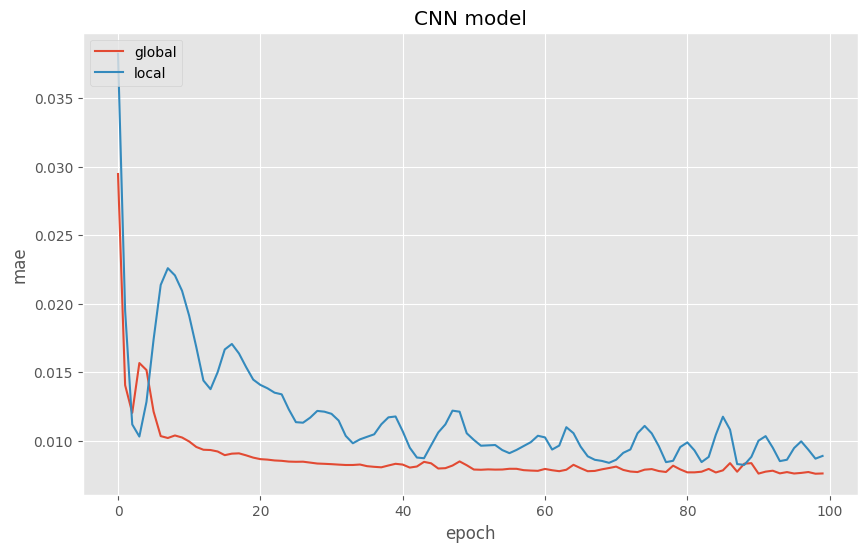

In [31]:
plt.figure(figsize=(10,6))
plt.plot(history_1.history['mae'])
plt.plot(history_1.history['val_mae'])
plt.title('CNN model')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['global', 'local'], loc='upper left')
plt.show()

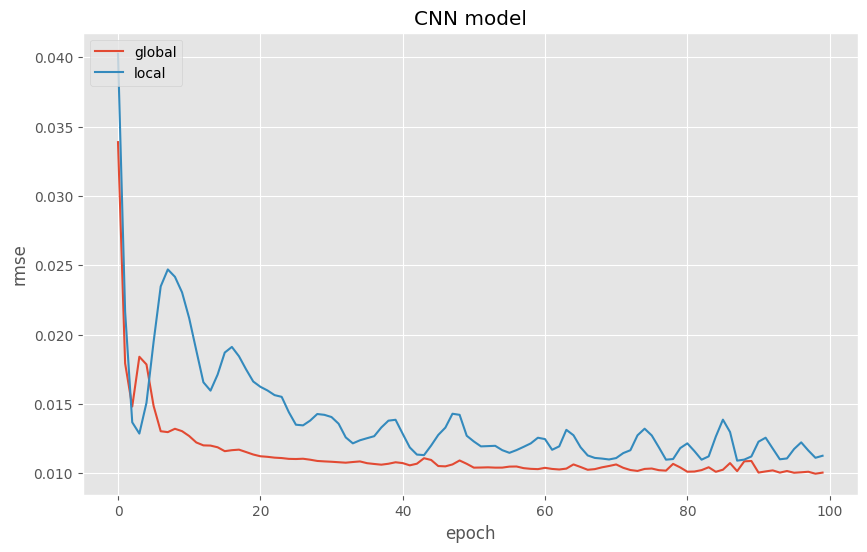

In [33]:
plt.figure(figsize=(10,6))
plt.plot(history_1.history['root_mean_squared_error'])
plt.plot(history_1.history['val_root_mean_squared_error'])
plt.title('CNN model')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['global', 'local'], loc='upper left')
plt.show()

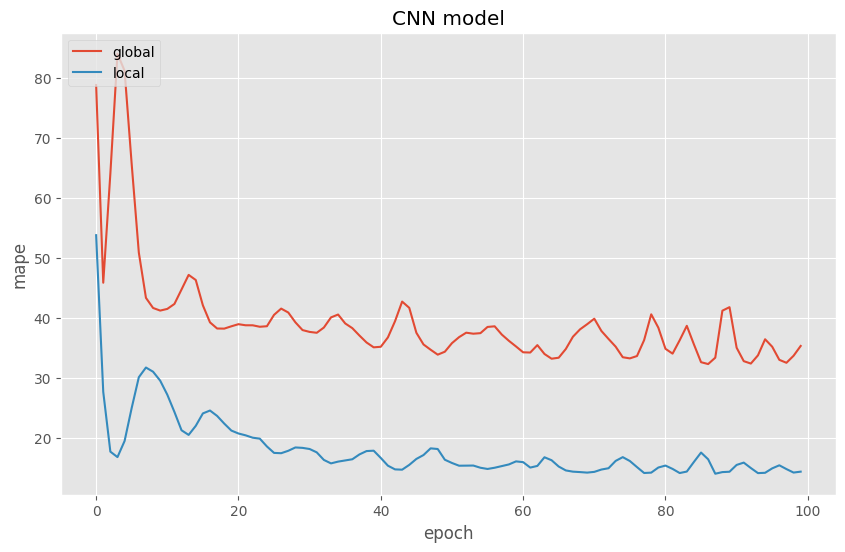

In [34]:
plt.figure(figsize=(10,6))
plt.plot(history_1.history['mape'])
plt.plot(history_1.history['val_mape'])
plt.title('CNN model')
plt.ylabel('mape')
plt.xlabel('epoch')
plt.legend(['global', 'local'], loc='upper left')
plt.show()

In [35]:
model.evaluate(test_windows, test_labels)


3/3 [==============================] - 0s 4ms/step - loss: 1.2694e-04 - root_mean_squared_error: 0.0113 - mape: 14.4568 - mae: 0.0089


[0.00012693676399067044,
 0.011266621761023998,
 14.456843376159668,
 0.00890280306339264]

In [36]:
model = tf.keras.models.load_model("model_experiments/model_conv1D")
model.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 5ms/step - loss: 1.1912e-04 - root_mean_squared_error: 0.0109 - mape: 14.1107 - mae: 0.0083


[0.00011912096670130268,
 0.010914254933595657,
 14.110734939575195,
 0.008310112170875072]

In [37]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [38]:
# Make predictions using model_dnn on the test dataset and view the results
model_preds = make_preds(model, test_windows)
len(model_preds), model_preds[:10]

3/3 [==============================] - 0s 2ms/step


(66,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.05090109, 0.0546092 , 0.06186254, 0.06089473, 0.06110011,
        0.06505077, 0.06252009, 0.06466974, 0.07141624, 0.06425285],
       dtype=float32)>)

In [39]:
# Evaluate preds
model_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_preds)
model_results

{'mae': 0.008310112,
 'mse': 0.00011912097,
 'rmse': 0.010914255,
 'mape': 14.110735,
 'mase': 0.9163771}

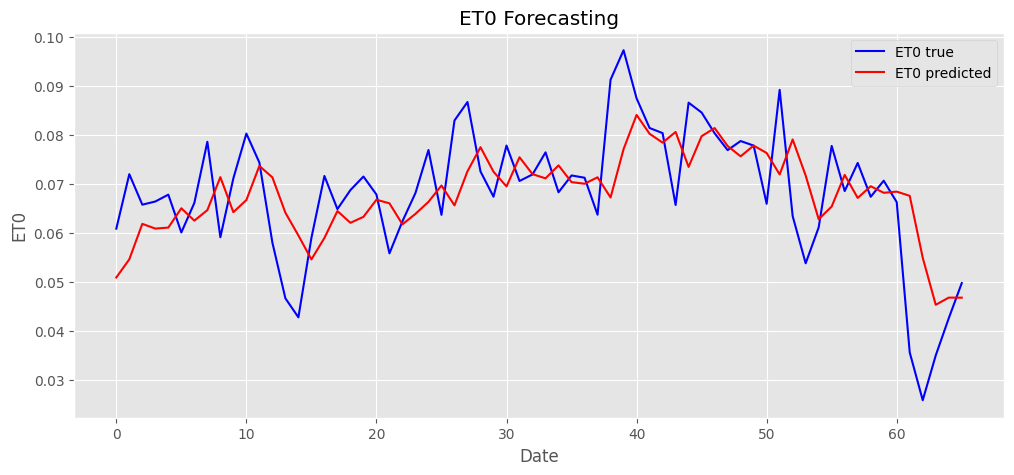

In [40]:
plt.figure(figsize=(12,5))  
plt.plot(tf.squeeze(test_labels), color='blue', label='ET0 true')  
plt.plot(model_preds, color='red', label='ET0 predicted')  
plt.title('ET0 Forecasting')  
plt.xlabel('Date')  
plt.ylabel('ET0')  
plt.legend()
#plt.savefig("eto.png")
plt.show()

# Saving cnn model and applying transfer learning

In [41]:
model.save('cnn_model.h5')

In [42]:
loaded_model=tf.keras.models.load_model('cnn_model.h5')

In [43]:
loaded_model.layers

In [44]:
model1=Sequential()
for layer in loaded_model.layers[:-1]:
 model1.add(layer)
 
# Freeze all the layers of base model
for layer in loaded_model.layers:
 layer.trainable=False
 
# adding new layers

model1.add(Conv1D(filters=64, kernel_size=5, padding="causal", activation="relu"))

#model1.add(Dropout(0.2))
model1.add(Dense(1))

In [45]:
model1.build(input_shape=(1,WINDOW_SIZE))

In [46]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_3 (Lambda)           multiple                  0         
                                                                 
 conv1d_3 (Conv1D)           multiple                  2304      
                                                                 
 conv1d_4 (Conv1D)           (1, 1, 64)                20544     
                                                                 
 dense_4 (Dense)             (1, 1, 1)                 65        
                                                                 
Total params: 22,913
Trainable params: 20,609
Non-trainable params: 2,304
_________________________________________________________________


In [48]:
rmse = tf.keras.metrics.RootMeanSquaredError()

# Compile model
model1.compile(loss="mean_squared_error",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[rmse,'mape','mae'])

In [49]:
%%time
history_2 = model1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
              y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
              epochs=100,
              verbose=1,
              batch_size=128,
              validation_data=(test_windows, test_labels),
              callbacks=[create_model_checkpoint(model_name='loaded_model')])

Epoch 1/100
1/3 [=========>....................] - ETA: 1s - loss: 0.0015 - root_mean_squared_error: 0.0384 - mape: 91.7588 - mae: 0.0348

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 2s 767ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - mape: 77.5130 - mae: 0.0289 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0383 - val_mape: 51.0639 - val_mae: 0.0363
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 3.1235e-04 - root_mean_squared_error: 0.0177 - mape: 42.0624 - mae: 0.0140

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 372ms/step - loss: 2.7254e-04 - root_mean_squared_error: 0.0165 - mape: 46.0823 - mae: 0.0130 - val_loss: 4.1413e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 26.4799 - val_mae: 0.0184
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 2.3474e-04 - root_mean_squared_error: 0.0153 - mape: 66.6990 - mae: 0.0128

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 350ms/step - loss: 2.4431e-04 - root_mean_squared_error: 0.0156 - mape: 69.0737 - mae: 0.0129 - val_loss: 2.5870e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 20.7673 - val_mae: 0.0139
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 2.9902e-04 - root_mean_squared_error: 0.0173 - mape: 78.5041 - mae: 0.0145 - val_loss: 2.9703e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 22.3826 - val_mae: 0.0152
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 2.4540e-04 - root_mean_squared_error: 0.0157 - mape: 69.5468 - mae: 0.0130 - val_loss: 4.6961e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 28.1589 - val_mae: 0.0197
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 1.9099e-04 - root_mean_squared_error: 0.0138 - mape: 55.0391 - mae: 0.0112 - val_loss: 6.8697e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 34.0683 - val_mae: 0.0242
Epoch 7/100
3/3 [==========

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 315ms/step - loss: 1.3858e-04 - root_mean_squared_error: 0.0118 - mape: 45.5120 - mae: 0.0092 - val_loss: 2.3430e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 19.8423 - val_mae: 0.0132
Epoch 19/100
1/3 [=========>....................] - ETA: 0s - loss: 1.5838e-04 - root_mean_squared_error: 0.0126 - mape: 46.9919 - mae: 0.0097

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 300ms/step - loss: 1.4180e-04 - root_mean_squared_error: 0.0119 - mape: 47.9426 - mae: 0.0093 - val_loss: 2.2366e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 19.4289 - val_mae: 0.0129
Epoch 20/100
3/3 [==============================] - 0s 19ms/step - loss: 1.3667e-04 - root_mean_squared_error: 0.0117 - mape: 46.2604 - mae: 0.0091 - val_loss: 2.4042e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 20.0701 - val_mae: 0.0134
Epoch 21/100
3/3 [==============================] - 0s 21ms/step - loss: 1.2923e-04 - root_mean_squared_error: 0.0114 - mape: 43.3475 - mae: 0.0088 - val_loss: 2.6106e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 20.8743 - val_mae: 0.0141
Epoch 22/100
3/3 [==============================] - 0s 20ms/step - loss: 1.2469e-04 - root_mean_squared_error: 0.0112 - mape: 40.0770 - mae: 0.0087 - val_loss: 3.0773e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 22.6354 - val_mae: 0.0155
Epoch 23/100
3/3 [======

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 343ms/step - loss: 1.1933e-04 - root_mean_squared_error: 0.0109 - mape: 39.5043 - mae: 0.0084 - val_loss: 1.7505e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 17.3063 - val_mae: 0.0111
Epoch 26/100
1/3 [=========>....................] - ETA: 0s - loss: 1.2481e-04 - root_mean_squared_error: 0.0112 - mape: 49.4591 - mae: 0.0085

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 349ms/step - loss: 1.2172e-04 - root_mean_squared_error: 0.0110 - mape: 42.5916 - mae: 0.0085 - val_loss: 1.6781e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 16.9345 - val_mae: 0.0107
Epoch 27/100
3/3 [==============================] - 0s 18ms/step - loss: 1.1787e-04 - root_mean_squared_error: 0.0109 - mape: 41.1446 - mae: 0.0083 - val_loss: 2.0676e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 18.6307 - val_mae: 0.0123
Epoch 28/100
3/3 [==============================] - 0s 18ms/step - loss: 1.1668e-04 - root_mean_squared_error: 0.0108 - mape: 36.6373 - mae: 0.0083 - val_loss: 2.4171e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 20.0331 - val_mae: 0.0134
Epoch 29/100
3/3 [==============================] - 0s 18ms/step - loss: 1.1936e-04 - root_mean_squared_error: 0.0109 - mape: 35.2478 - mae: 0.0085 - val_loss: 1.9506e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 18.1111 - val_mae: 0.0118
Epoch 30/100
1/3 [======

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 365ms/step - loss: 1.1269e-04 - root_mean_squared_error: 0.0106 - mape: 37.4325 - mae: 0.0081 - val_loss: 1.3981e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 15.4927 - val_mae: 0.0094
Epoch 31/100
1/3 [=========>....................] - ETA: 0s - loss: 1.1614e-04 - root_mean_squared_error: 0.0108 - mape: 41.0465 - mae: 0.0087

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 365ms/step - loss: 1.2456e-04 - root_mean_squared_error: 0.0112 - mape: 43.8392 - mae: 0.0086 - val_loss: 1.3407e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 15.1708 - val_mae: 0.0090
Epoch 32/100
3/3 [==============================] - 0s 20ms/step - loss: 1.1963e-04 - root_mean_squared_error: 0.0109 - mape: 42.3090 - mae: 0.0083 - val_loss: 1.7750e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 17.3076 - val_mae: 0.0112
Epoch 33/100
3/3 [==============================] - 0s 20ms/step - loss: 1.1186e-04 - root_mean_squared_error: 0.0106 - mape: 35.5160 - mae: 0.0081 - val_loss: 2.1706e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 18.9664 - val_mae: 0.0126
Epoch 34/100
3/3 [==============================] - 0s 18ms/step - loss: 1.1607e-04 - root_mean_squared_error: 0.0108 - mape: 34.1755 - mae: 0.0084 - val_loss: 1.7644e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 17.2237 - val_mae: 0.0111
Epoch 35/100
3/3 [======

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 548ms/step - loss: 1.1172e-04 - root_mean_squared_error: 0.0106 - mape: 39.2688 - mae: 0.0080 - val_loss: 1.3300e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 15.0752 - val_mae: 0.0090
Epoch 37/100
3/3 [==============================] - 0s 18ms/step - loss: 1.1326e-04 - root_mean_squared_error: 0.0106 - mape: 40.0300 - mae: 0.0081 - val_loss: 1.5431e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 16.0835 - val_mae: 0.0101
Epoch 38/100
3/3 [==============================] - 0s 22ms/step - loss: 1.1013e-04 - root_mean_squared_error: 0.0105 - mape: 35.0056 - mae: 0.0080 - val_loss: 2.4161e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 19.9660 - val_mae: 0.0134
Epoch 39/100
3/3 [==============================] - 0s 20ms/step - loss: 1.3332e-04 - root_mean_squared_error: 0.0115 - mape: 33.4462 - mae: 0.0092 - val_loss: 2.4726e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 20.1775 - val_mae: 0.0136
Epoch 40/100
3/3 [======

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 334ms/step - loss: 1.0830e-04 - root_mean_squared_error: 0.0104 - mape: 35.5470 - mae: 0.0079 - val_loss: 1.3281e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 15.0239 - val_mae: 0.0090
Epoch 42/100
1/3 [=========>....................] - ETA: 0s - loss: 1.1743e-04 - root_mean_squared_error: 0.0108 - mape: 38.6437 - mae: 0.0084

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 353ms/step - loss: 1.1149e-04 - root_mean_squared_error: 0.0106 - mape: 39.5660 - mae: 0.0080 - val_loss: 1.2943e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 14.8173 - val_mae: 0.0088
Epoch 43/100
3/3 [==============================] - 0s 21ms/step - loss: 1.1247e-04 - root_mean_squared_error: 0.0106 - mape: 39.9706 - mae: 0.0080 - val_loss: 1.3914e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 15.2898 - val_mae: 0.0094
Epoch 44/100
3/3 [==============================] - 0s 20ms/step - loss: 1.0588e-04 - root_mean_squared_error: 0.0103 - mape: 36.7090 - mae: 0.0078 - val_loss: 1.5901e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 16.2302 - val_mae: 0.0103
Epoch 45/100
3/3 [==============================] - 0s 18ms/step - loss: 1.0623e-04 - root_mean_squared_error: 0.0103 - mape: 34.8780 - mae: 0.0079 - val_loss: 1.5670e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 16.1030 - val_mae: 0.0102
Epoch 46/100
3/3 [======

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 328ms/step - loss: 1.0452e-04 - root_mean_squared_error: 0.0102 - mape: 36.2568 - mae: 0.0077 - val_loss: 1.2668e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 14.8522 - val_mae: 0.0085
Epoch 58/100
1/3 [=========>....................] - ETA: 0s - loss: 1.0471e-04 - root_mean_squared_error: 0.0102 - mape: 32.6202 - mae: 0.0081

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 344ms/step - loss: 1.1650e-04 - root_mean_squared_error: 0.0108 - mape: 40.6749 - mae: 0.0082 - val_loss: 1.2491e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 14.5169 - val_mae: 0.0084
Epoch 59/100
3/3 [==============================] - 0s 24ms/step - loss: 1.0628e-04 - root_mean_squared_error: 0.0103 - mape: 37.3694 - mae: 0.0078 - val_loss: 1.4389e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 15.3696 - val_mae: 0.0096
Epoch 60/100
3/3 [==============================] - 0s 21ms/step - loss: 1.0919e-04 - root_mean_squared_error: 0.0104 - mape: 33.5451 - mae: 0.0081 - val_loss: 1.8652e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 17.4841 - val_mae: 0.0115
Epoch 61/100
3/3 [==============================] - 0s 23ms/step - loss: 1.1635e-04 - root_mean_squared_error: 0.0108 - mape: 32.4405 - mae: 0.0084 - val_loss: 1.5196e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 15.7506 - val_mae: 0.0100
Epoch 62/100
1/3 [======

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 415ms/step - loss: 1.0270e-04 - root_mean_squared_error: 0.0101 - mape: 34.0632 - mae: 0.0078 - val_loss: 1.2414e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 14.4804 - val_mae: 0.0084
Epoch 63/100
3/3 [==============================] - 0s 20ms/step - loss: 1.1746e-04 - root_mean_squared_error: 0.0108 - mape: 41.3986 - mae: 0.0083 - val_loss: 1.2761e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 14.9854 - val_mae: 0.0085
Epoch 64/100
3/3 [==============================] - 0s 23ms/step - loss: 1.2069e-04 - root_mean_squared_error: 0.0110 - mape: 42.0393 - mae: 0.0085 - val_loss: 1.3164e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 14.7657 - val_mae: 0.0090
Epoch 65/100
3/3 [==============================] - 0s 21ms/step - loss: 1.0390e-04 - root_mean_squared_error: 0.0102 - mape: 34.9874 - mae: 0.0077 - val_loss: 1.7515e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 16.9303 - val_mae: 0.0110
Epoch 66/100
3/3 [======

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 442ms/step - loss: 1.0505e-04 - root_mean_squared_error: 0.0102 - mape: 37.8194 - mae: 0.0078 - val_loss: 1.2255e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 14.1418 - val_mae: 0.0084
Epoch 79/100
3/3 [==============================] - 0s 20ms/step - loss: 1.0722e-04 - root_mean_squared_error: 0.0104 - mape: 38.5269 - mae: 0.0079 - val_loss: 1.2811e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 14.4465 - val_mae: 0.0088
Epoch 80/100
3/3 [==============================] - 0s 18ms/step - loss: 1.0074e-04 - root_mean_squared_error: 0.0100 - mape: 35.5816 - mae: 0.0077 - val_loss: 1.5176e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 15.6424 - val_mae: 0.0100
Epoch 81/100
3/3 [==============================] - 0s 19ms/step - loss: 1.0216e-04 - root_mean_squared_error: 0.0101 - mape: 32.7644 - mae: 0.0078 - val_loss: 1.6262e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 16.1490 - val_mae: 0.0105
Epoch 82/100
3/3 [======

INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


INFO:tensorflow:Assets written to: model_experiments/loaded_model/assets


3/3 [==============================] - 1s 491ms/step - loss: 9.9551e-05 - root_mean_squared_error: 0.0100 - mape: 35.0656 - mae: 0.0076 - val_loss: 1.2170e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 14.2335 - val_mae: 0.0083
Epoch 84/100
3/3 [==============================] - 0s 24ms/step - loss: 1.1415e-04 - root_mean_squared_error: 0.0107 - mape: 40.2397 - mae: 0.0082 - val_loss: 1.2175e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 14.2365 - val_mae: 0.0083
Epoch 85/100
3/3 [==============================] - 0s 23ms/step - loss: 1.0832e-04 - root_mean_squared_error: 0.0104 - mape: 38.5066 - mae: 0.0080 - val_loss: 1.3480e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 14.8241 - val_mae: 0.0092
Epoch 86/100
3/3 [==============================] - 0s 22ms/step - loss: 1.0043e-04 - root_mean_squared_error: 0.0100 - mape: 33.2438 - mae: 0.0076 - val_loss: 1.5957e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 15.9753 - val_mae: 0.0103
Epoch 87/100
3/3 [======

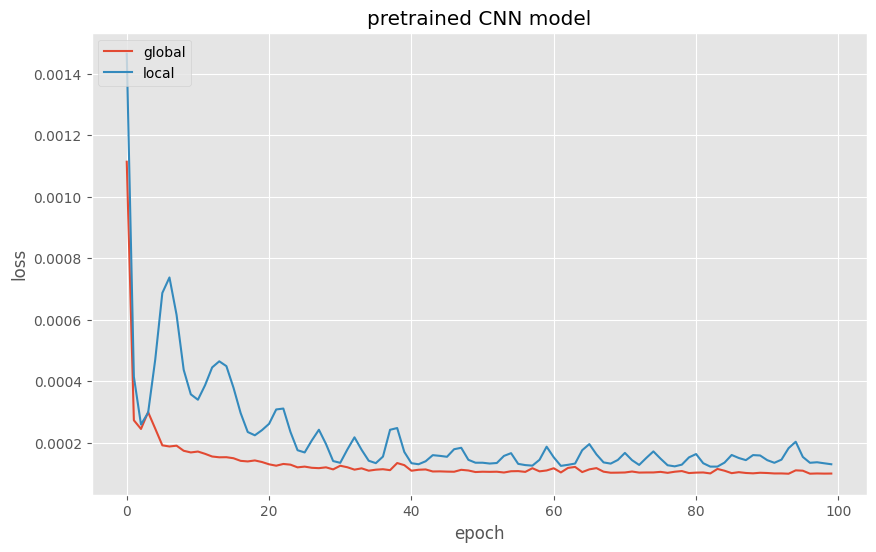

In [50]:
plt.figure(figsize=(10,6))
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('pretrained CNN model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['global', 'local'], loc='upper left')
plt.show()

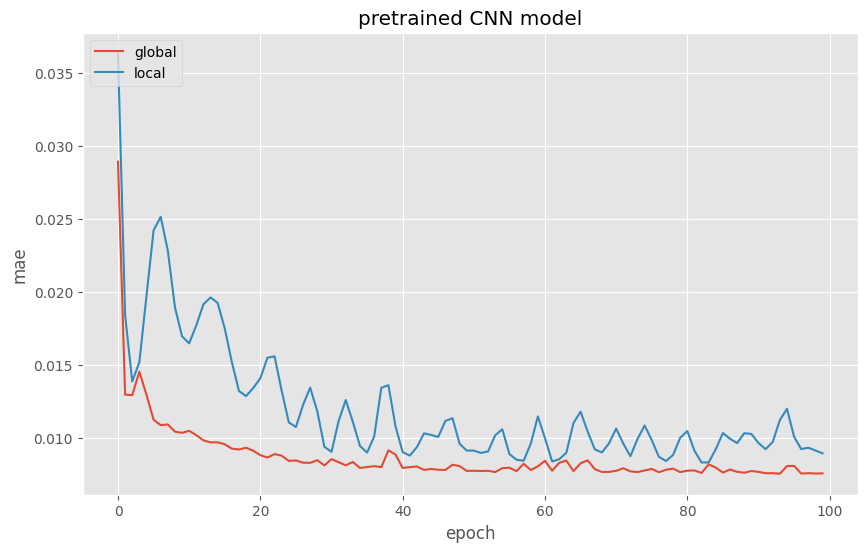

In [51]:
plt.figure(figsize=(10,6))
plt.plot(history_2.history['mae'])
plt.plot(history_2.history['val_mae'])
plt.title('pretrained CNN model')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['global', 'local'], loc='upper left')
plt.show()

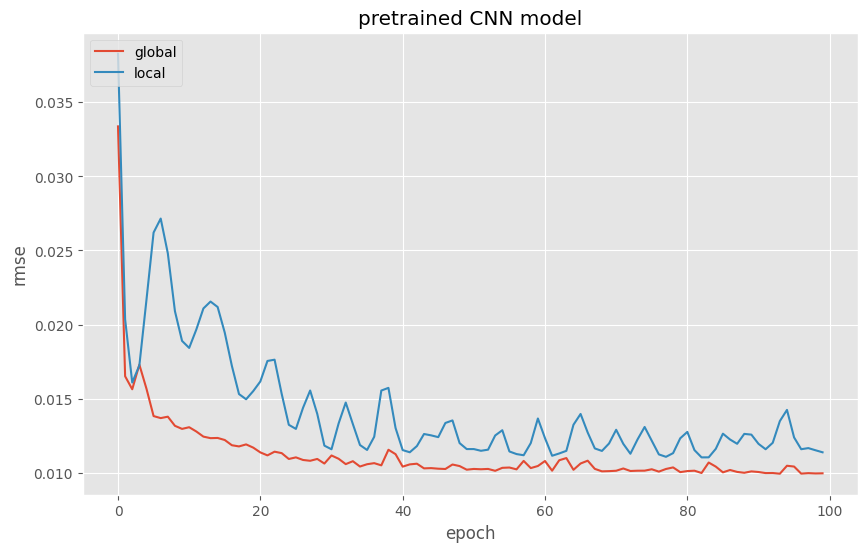

In [52]:
plt.figure(figsize=(10,6))
plt.plot(history_2.history['root_mean_squared_error'])
plt.plot(history_2.history['val_root_mean_squared_error'])
plt.title('pretrained CNN model')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['global', 'local'], loc='upper left')
plt.show()

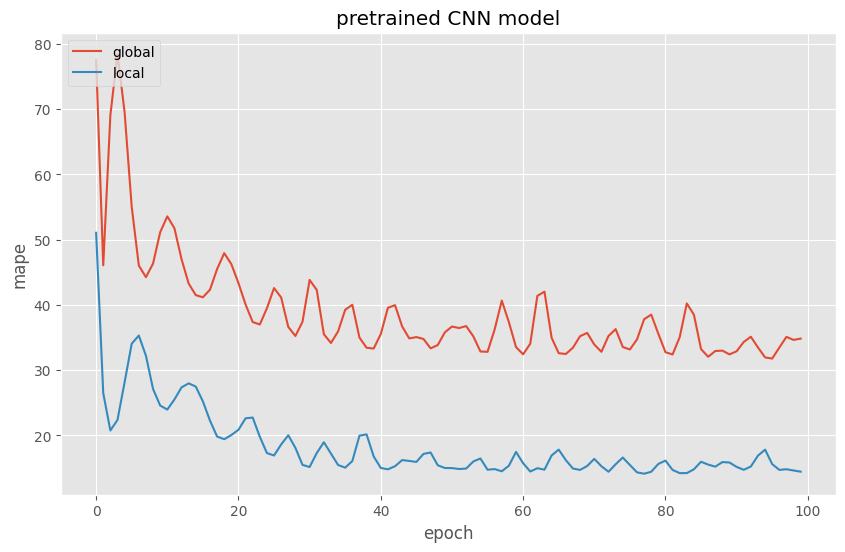

In [53]:
plt.figure(figsize=(10,6))
plt.plot(history_2.history['mape'])
plt.plot(history_2.history['val_mape'])
plt.title('pretrained CNN model')
plt.ylabel('mape')
plt.xlabel('epoch')
plt.legend(['global', 'local'], loc='upper left')
plt.show()

In [ ]:
model_cnn_transfer = tf.keras.models.load_model("model_experiments/loaded_model")
model_cnn_transfer.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 4ms/step - loss: 1.2727e-04 - root_mean_squared_error: 0.0113 - mae: 0.0086


[0.00012726533168461174, 0.011281194165349007, 0.008647440932691097]

In [ ]:
model_cnn_preds = make_preds(model_cnn_transfer, test_windows)
len(model_cnn_preds), model_cnn_preds[:10]

(66, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.04899385, 0.05292315, 0.05794185, 0.05821697, 0.06042644,
        0.0637238 , 0.06255518, 0.06449168, 0.06891129, 0.06394944],
       dtype=float32)>)

In [ ]:
model_cnn_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_cnn_preds)
model_cnn_results

{'mae': 0.008647441,
 'mape': 14.754489,
 'mase': 0.9535752,
 'mse': 0.00012726533,
 'rmse': 0.011281194}

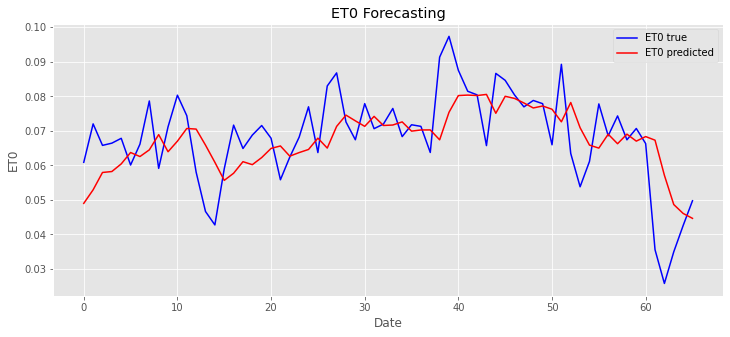

In [ ]:
plt.figure(figsize=(12,5))  
plt.plot(tf.squeeze(test_labels), color='blue', label='ET0 true')  
plt.plot(model_cnn_preds, color='red', label='ET0 predicted')  
plt.title('ET0 Forecasting')  
plt.xlabel('Date')  
plt.ylabel('ET0')  
plt.legend()
#plt.savefig("eto.png")
plt.show()

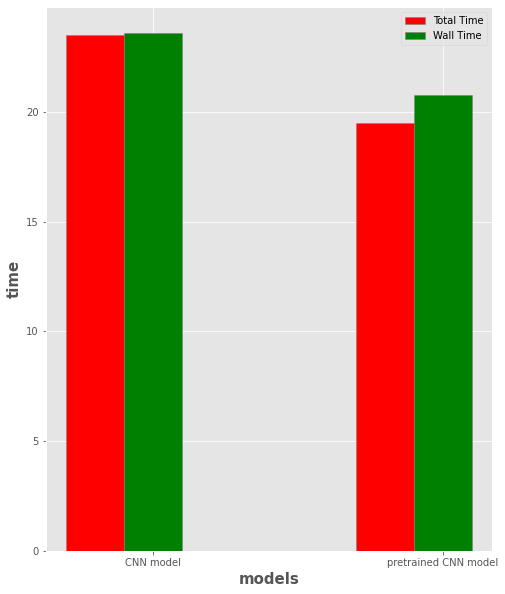

In [ ]:
barWidth = 0.20
fig = plt.subplots(figsize =(8, 10))
 
# set height of bar
total_time = [23.5, 19.5]
wall_time = [23.6, 20.8]

 
# Set position of bar on X axis
br1 = np.arange(len(total_time))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, total_time, color ='r', width = barWidth,
        edgecolor ='grey', label ='Total Time')
plt.bar(br2, wall_time, color ='g', width = barWidth,
        edgecolor ='grey', label ='Wall Time')
 
# Adding Xticks
plt.xlabel('models', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(total_time))],
        ['CNN model', 'pretrained CNN model'])
 
plt.legend()
plt.show()

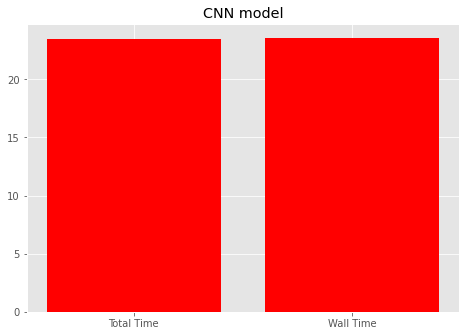

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Total Time', 'Wall Time']
time = [23.5, 23.6]
ax.bar(x,time,color='r')
plt.title('CNN model')
plt.show()

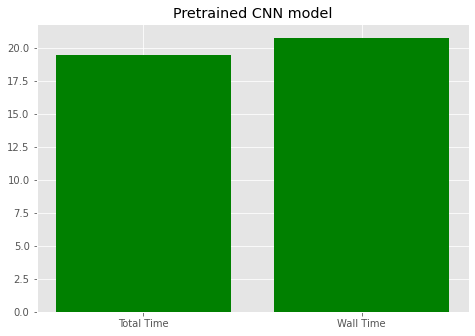

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Total Time', 'Wall Time']
time = [19.5, 20.8]
ax.bar(x,time,color='g')
plt.title('Pretrained CNN model')
plt.show()